### Game Review Analysis and Scoring

#### Load all relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [3]:
plt.style.use('ggplot')

In [6]:
df_review = pd.read_csv('GameReviews_consolidated.csv')
df_stat = pd.read_csv('GameStats_consolidated.csv')

In [8]:
df_review.head()

,Unnamed: 0,Unnamed: 0.1,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,appid,timestamp_dev_responded,developer_response
0,0,1283580_1,76352783,76561198044593213,english,wooow awesome game! had a lot of fun. It is ha...,1600726883,1600726883,True,20,0,0.695501,0,True,False,False,1283580,NaN,NaN
1,1,1283580_2,70557090,76561198088813295,english,"A simple, addictive and challenging game. When...",1591740908,1591740908,True,12,0,0.676471,0,True,False,False,1283580,NaN,NaN
2,2,1283580_3,76356193,76561197993312336,english,This game took me back to the old days of arca...,1600733890,1600733890,True,18,0,0.491638,0,True,False,False,1283580,NaN,NaN
3,3,1283580_4,76358855,76561198319721830,english,It's a good game for a good price. It made me ...,1600739253,1600739253,True,10,0,0.491387,0,True,False,False,1283580,NaN,NaN
4,4,1283580_5,70843366,76561198070981262,english,Plays great in Linux on the Latest PROTON! Als...,1592252895,1592252895,True,0,0,0.456160,0,True,False,False,1283580,NaN,NaN


In [19]:
df_review = df_review.rename(columns={'Unnamed: 0.1': 'reviewid'})
df_review.head()

,Unnamed: 0,reviewid,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,appid,timestamp_dev_responded,developer_response
0,0,1283580_1,76352783,76561198044593213,english,wooow awesome game! had a lot of fun. It is ha...,1600726883,1600726883,True,20,0,0.695501,0,True,False,False,1283580,NaN,NaN
1,1,1283580_2,70557090,76561198088813295,english,"A simple, addictive and challenging game. When...",1591740908,1591740908,True,12,0,0.676471,0,True,False,False,1283580,NaN,NaN
2,2,1283580_3,76356193,76561197993312336,english,This game took me back to the old days of arca...,1600733890,1600733890,True,18,0,0.491638,0,True,False,False,1283580,NaN,NaN
3,3,1283580_4,76358855,76561198319721830,english,It's a good game for a good price. It made me ...,1600739253,1600739253,True,10,0,0.491387,0,True,False,False,1283580,NaN,NaN
4,4,1283580_5,70843366,76561198070981262,english,Plays great in Linux on the Latest PROTON! Als...,1592252895,1592252895,True,0,0,0.456160,0,True,False,False,1283580,NaN,NaN


In [9]:
df_stat.head()

,Unnamed: 0,Unnamed: 0.1,appid,name,developer,publisher,score_rank,positive,negative,userscore,...,ccu,languages,genre,tags,num_reviews,review_score,review_score_desc,total_positive,total_negative,total_reviews
0,0,0,250340,Blockland,"Eric Hartman, Ben Garney, Anthony Rotondo",Step 1 Games LLC,NaN,4042,1499,0,...,46,English,"Action, Indie, Simulation","Sandbox, Building, Multiplayer, LEGO, Open Wor...",4,6,Mostly Positive,1678,676,2354
1,1,1,429570,The Walking Dead: Michonne - A Telltale Minise...,Telltale Games,Skybound Games,NaN,4754,1292,0,...,9,"English, French, German, Spanish - Spain, Port...",Adventure,"Adventure, Zombies, Story Rich, Choices Matter...",1,6,Mostly Positive,1407,467,1874
2,2,2,775500,SCARLET NEXUS,BANDAI NAMCO Studios Inc.,BANDAI NAMCO Entertainment,NaN,8666,1523,0,...,367,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, RPG","Action, Anime, RPG, Adventure, Action RPG, JRP...",20,8,Very Positive,2892,346,3238
3,3,3,272470,The Incredible Adventures of Van Helsing II,NeocoreGames,NeocoreGames,NaN,1581,725,0,...,7,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, RPG","RPG, Action, Adventure, Hack and Slash, Action...",20,5,Mixed,479,237,716
4,4,4,222750,Wargame: Airland Battle,Eugen Systems,Eugen Systems,NaN,3670,505,0,...,47,"English, German, French, Italian, Spanish - Sp...","Indie, Simulation, Strategy","Strategy, RTS, Military, Cold War, Wargame, Re...",1,8,Very Positive,1921,276,2197


In [ ]:
#Checking for duplicates and remove columns 
df_review = df_review.drop(columns = ['Unnamed: 0'])
df_review = df_review.drop_duplicates()

#Removing empty review columns
df_review = df_review.dropna(subset=['review'])

df_stat = df_stat.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
df_stat = df_stat.drop_duplicates()

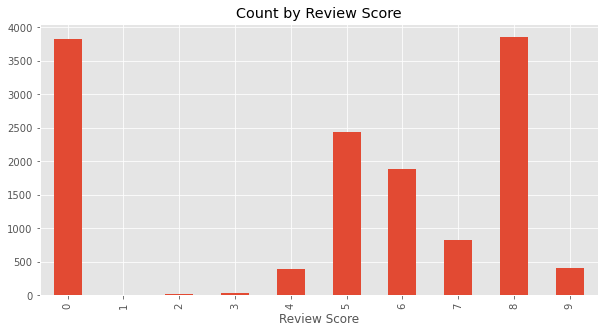

In [48]:
ax = df_stat['review_score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count by Review Score',
          figsize=(10, 5))
ax.set_xlabel('Review Score')
plt.show()

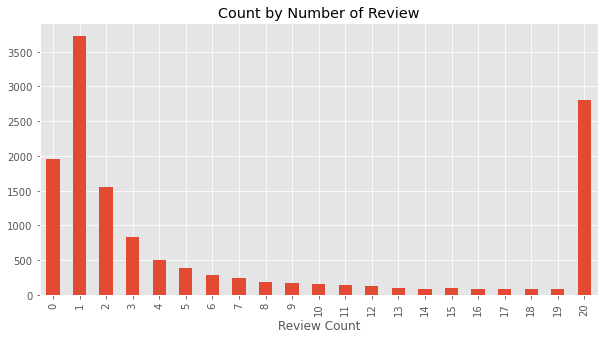

In [49]:
ax = df_stat['num_reviews'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count by Number of Review',
          figsize=(10, 5))
ax.set_xlabel('Review Count')
plt.show()

#### Implement VADER Scoring

In [4]:
#Use this command to download VADER
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\243074\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
#Create instance of SentimentIntensityAnalyzer
sentAnlzer = SentimentIntensityAnalyzer()

#Calculate the Polarity Score for the entire dataset
dict_polarity = {}

#Store the exceptions while analysing sentiment polarity
dict_errors = {}

#Counter to identify errors
counter = 0
reviewCount = len(df_review)

for i, row in tqdm(df_review.iterrows(), total=reviewCount):
    try:
        dict_polarity[row['reviewid']] = sentAnlzer.polarity_scores(row['review'])
    except Exception as e:
        counter += 1
        dict_errors[row['reviewid']] = str(e)
    
print(f" Total Reviews : {reviewCount}\n Successfully Analyzed : {reviewCount - counter}\n ") 
if counter >0 :
    print(f" Failed to Analyze: {counter}")

  0%|          | 0/90132 [00:00<?, ?it/s]

 Total Reviews : 90132
 Successfully Analyzed : 90132
 Failed to Analyze: 0 


In [53]:
df_vad_polarity = pd.DataFrame(dict_polarity).T
df_vad_polarity = df_vad_polarity.reset_index().rename(columns={'index': 'reviewid'})
df_vad_polarity.head()

In [80]:
df_Polarity.head()

,appid,neg,neu,pos,compound
0,250340,0.072,0.698,0.230,0.274
1,429570,0.132,0.688,0.180,0.370
2,775500,0.096,0.628,0.276,0.446
3,272470,0.091,0.741,0.169,0.429
4,222750,0.218,0.506,0.276,-0.190


In [81]:
def calculateScore(neg,neu, pos, compound):
    #Implement logic to define the condition for Postive, Negative, Mixed, Mostly Negative and Mostly Positive
    return 'mixed'

In [77]:
#Create an empty dataframe
df_Polarity = pd.DataFrame(columns = ['appid', 'neg', 'neu', 'pos', 'compound', 'rev_score'])

#Loop through stats 
for i, row in tqdm(df_stat.iterrows(), total=len(df_stat)):
    df = df_vad_polarity[df_vad_polarity['reviewid'].str.contains(str(row['appid']))]
    df_len = len(df)
    if(df_len >0): 
        df = df.sum(axis = 0)
        neg = round(df[1]/df_len,3)
        neu = round(df[2]/df_len,3)
        pos = round(df[3]/df_len,3)
        compound = round(df[4]/df_len,3)
        score = calculateScore(neg,neu, pos, compound )
    else:
        score = 'NA'
        neg = 0
        neu = 0
        pos = 0
        compund = 0
    df_Polarity = df_Polarity.append({'appid' : str(row['appid']), 'neg' : neg, 'neu' : neu, 'pos' : pos,'compound' : compound, 'rev_score': score}, ignore_index = True)
    #break

  0%|          | 0/13705 [00:00<?, ?it/s]

In [90]:
#Merge the 2 data frames into a single frame and validate
df_stat['appid'] = df_stat['appid'].astype(str)
df_GameStats = df_Polarity.merge(df_stat, how='left', on = 'appid')

In [94]:
df_GameStats.head()

,appid,neg,neu,pos,compound,rev_score,name,developer,publisher,score_rank,...,ccu,languages,genre,tags,num_reviews,review_score,review_score_desc,total_positive,total_negative,total_reviews
0,250340,0.072,0.698,0.230,0.274,mixed,Blockland,"Eric Hartman, Ben Garney, Anthony Rotondo",Step 1 Games LLC,NaN,...,46,English,"Action, Indie, Simulation","Sandbox, Building, Multiplayer, LEGO, Open Wor...",4,6,Mostly Positive,1678,676,2354
1,429570,0.132,0.688,0.180,0.370,mixed,The Walking Dead: Michonne - A Telltale Minise...,Telltale Games,Skybound Games,NaN,...,9,"English, French, German, Spanish - Spain, Port...",Adventure,"Adventure, Zombies, Story Rich, Choices Matter...",1,6,Mostly Positive,1407,467,1874
2,775500,0.096,0.628,0.276,0.446,mixed,SCARLET NEXUS,BANDAI NAMCO Studios Inc.,BANDAI NAMCO Entertainment,NaN,...,367,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, RPG","Action, Anime, RPG, Adventure, Action RPG, JRP...",20,8,Very Positive,2892,346,3238
3,775500,0.096,0.628,0.276,0.446,mixed,SCARLET NEXUS,BANDAI NAMCO Studios Inc.,BANDAI NAMCO Entertainment,NaN,...,367,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, RPG","Action, Anime, RPG, Adventure, Action RPG, JRP...",20,8,Very Positive,2891,346,3237
4,272470,0.091,0.741,0.169,0.429,mixed,The Incredible Adventures of Van Helsing II,NeocoreGames,NeocoreGames,NaN,...,7,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, RPG","RPG, Action, Adventure, Hack and Slash, Action...",20,5,Mixed,479,237,716
